# Support Vector Machines (SVM) - Hard Margin Case
---
Recall the binary classification problem that SVMs try to solve. The hard margin SVM finds the seperating decision bounary with the largest margin. 

<img src="MaxMargin.jpg" height="400" width="400">

In this assigment, you will write the code to find the maximum margin for the hard margin case.

We showed in class that we could solve this problem  by reducing it to the problem of solving a quadratic programming problem (QP).  There are many solvers for quadratic programming problems. We will use the *Convex Optimization Library*, [CVXOPT](https://cvxopt.org/userguide/coneprog.html#quadratic-programming); a free software package that works well with Python and numpy. 
You will need to install [CVXOPT](https://cvxopt.org/install/)

In CVXOPT, the quadratic programming problem solver, <b><i>cvxopt.solvers.qp</i></b>,  solves the following problem:

$$\begin{eqnarray} \min_{x}\frac{1}{2} x^{T}Px - q^{T}x \nonumber \\\ \textrm{s.t.}\quad Gx \preceq h \\\ \textrm{and}\quad Ax = b \end{eqnarray}$$

 Note that $ Gx \preceq h $ is taken elementwise. 

The solver's (simplified) API is `cvxopt.solvers.qp(P, q, G, h, A, b)` 
where only $P$ and $q$ are required. 

You will need to match the solver's API.

The solver's argument's type must be CVXOPT matrices. I suggest you first create the arguments as NumpPy arrays and matrices and then convert them to CVXOPT matrices (For example, first import the library: `from cvxopt import matrix` then convert a NumPy matrix `P` to a CVXOPT matrix using ` P = matrix(P)`)

What is return by the solver  is a Python dictionary.  If you save the return value in a variable called `sol` (i.e. `sol = solvers.qp(...)`), you can access to the solution of the quadratic programming problem by typing `sol["x"]`.


# Hard Margin Case

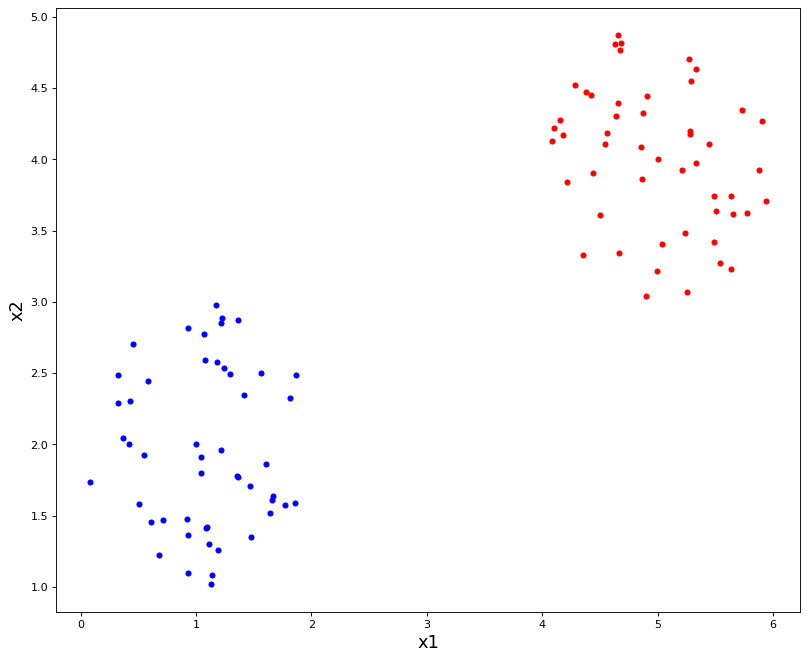

In [3]:
import numpy as np
import csv
from numpy import genfromtxt
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
import cvxopt
%matplotlib inline


X=np.genfromtxt('X.csv', delimiter=',')

y=np.genfromtxt('y.csv', delimiter=',')


idx_1=np.where(y==1)


idx_2=np.where(y==-1)

plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X[idx_1,0], X[idx_1,1], s=20, c='b', marker="o")

plt.scatter(X[idx_2,0], X[idx_2,1], s=20, c='r', marker="o")

plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)


plt.show()


## SVM Primal  Problem
---
### Problem 1.1
![qp.png](attachment:qp.png)
You will now use the quadratic problem solver to find the maximum margin for the SVM primal problem:

$$\begin{eqnarray}\left.\begin{aligned}  
&\min_{w}\frac{1}{2}||w||^{2} & \nonumber \\\ 
&\textrm{s.t.}  \quad y^{(i)}(w^{T}{\bf x}^{(i)} + w_0) \ge 1 \quad \forall i \end{aligned}\right.\end{eqnarray}$$


Look back at the lecture notes for the primal problem.  Please note that the variable names used in the lecture are different from the variable names given to decribe the API for CVXOPT's quadratic problem solver.


In [4]:
def linear_svm(X,y):
    solvers.options['show_progress'] = False
#     store the shape of X to two variables: N,F

    N,F=X.shape

#     create the Identity matrix using np.diag and np.ones
    

#     for each element in Q:
    
#         when row number is 0, set Q[row, col]=0

#         when col number is 0 set Q[row,col]=0

#         else, compute Identity [row-1,col-1] and set it to Q[row,col]
    Q=np.identity(F+1)*1.
    Q[0][0]=0.


#     use cvxopt.matrix to create a new variable p with value Q

    p=cvxopt.matrix(Q)

#     use cvxopt.matrix to create a new variable q with value np.zeros(F+1)
    q = cvxopt.matrix(np.zeros(F+1)*1.)

#     create an empty list
    a = []

#     for n in range(N):
    for n in range(N):
        

#         create a zero matric with size F+1
        tempo=np.zeros(F+1)
#         for each element in the matric above:
        for z in range(F+1):
            if z==0:
                tempo[z]=1
            else:
                tempo[z]=X[n].T[z-1]
#             when the index=0, then set it to 1
        

#             else, set the value to X[n].T[i-1]

#         append the y[n]*updated matric to the empty list above (the one above the for loop
        a=np.append(a, y[n]*tempo)

#     change the empty list to the np array and times -1
    a=a*-1.

    a= np.resize(a,(100,3))

#     use cvxopt.matrix to convert above np array and store it in a variable: G
    G=cvxopt.matrix(a)

#     create a variable named h with value np.ones(N)*-1 and convert it to cvxopt

    h = cvxopt.matrix(np.ones(N)*-1.)

        #print(G.shape)
    

    
        #print(q.shape)

#     solve the primal using cvxopt.solvers.qp
    sol=cvxopt.solvers.qp(p,q,G,h)
    alphas = np.array(sol['x'])
    return alphas

#     return the answer.


# fit svm classifier

# print the weights
answer = linear_svm(X,y)
w0 = answer[0]
w = [answer[1],answer[2]]

print('w = ', w)
print('b = ', w0)

w =  [array([-0.72110613]), array([-0.24431578])]
b =  [2.95321828]


### Plotting the  decision boundary

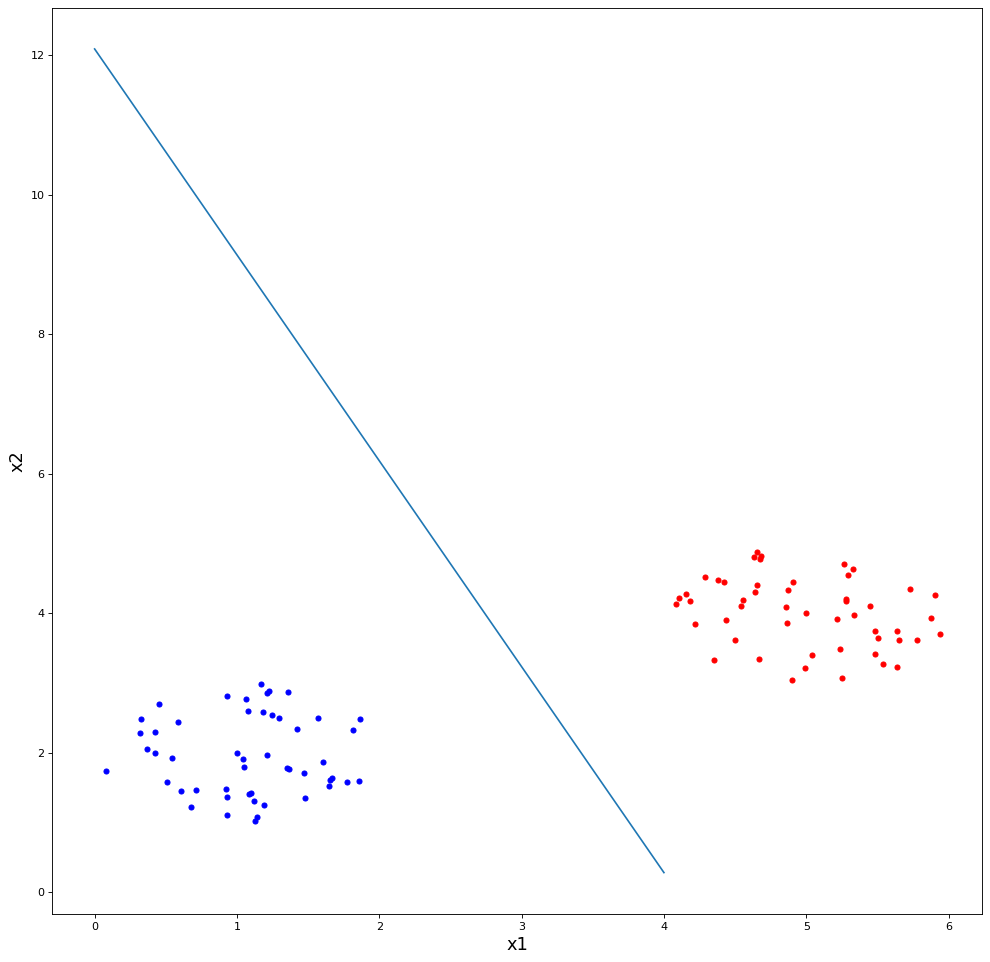

In [5]:
def plot_data_with_decision_boundary(X, y, w, w0, fig_size, labels=['x1', 'x2']):


    idx_1=np.where(y==1)

    idx_2=np.where(y==-1)

    plt.figure(num=None, figsize=fig_size, dpi=80, facecolor='w', edgecolor='k')

    plt.scatter(X[idx_1,0], X[idx_1,1], s=20, c='b', marker="o")

    plt.scatter(X[idx_2,0], X[idx_2,1], s=20, c='r', marker="o")

    plt.xlabel(labels[0], fontsize=16)
    plt.ylabel(labels[1], fontsize=16)

    f = np.arange(0.0,5.0)
    z = (-w[0]/w[1])*f - w0/w[1]

    plt.plot(f, z)


    plt.show()   

plot_data_with_decision_boundary(X, y, w, w0, fig_size=(15, 15), labels=['x1', 'x2'])


Determine which points are closest to the decision boundary. What is the functional margin of the points closest to the decision boundary?   

In [6]:
import math

a,b=X.shape

sv_blue=-1
sv_red=-1
index_red=0
index_blue=0

idx_1=np.array(idx_1)
dump, size = idx_1.shape

for z in range(size): #blue
    d = abs((w[0] * X[idx_1[0,z],0] + w[1] * X[idx_1[0,z],1] + w0)) / (math.sqrt(w[0] * w[0] + w[1] * w[1])) 
    if d < sv_blue or sv_blue==-1:
        sv_blue=float(d)
        index_blue=idx_1[0,z]

idx_2=np.array(idx_2)
dump, size = idx_2.shape

for z in range(size): #red
    d = abs((w[0] * X[idx_2[0,z],0] + w[1] * X[idx_2[0,z],1] + w0)) / (math.sqrt(w[0] * w[0] + w[1] * w[1])) 
    if d < sv_red or sv_red==-1:
        sv_red=float(d)
        index_red=idx_2[0,z]

print('The margin for the red data is', sv_red, 'at data point', index_red)
print('The margin for the blue data is', sv_blue, 'at data point', index_blue)



The margin for the red data is 1.3134218835808014 at data point 63
The margin for the blue data is 1.313421883582484 at data point 33


Write the decision function $f_{\texttt{primal}}({\bf x})$ to predict examples.  Use this function to predict the label of $(3.0, 1.5)^T$ and $(1.2, 3.0)^T$

In [7]:
def f_primal(x): 
    d = (w[0] * x[0] + w[1] * x[1] + w0) / (math.sqrt(w[0] * w[0] + w[1] * w[1]))
    if d < 0:
        print('The data', x, 'is red')
    else:
        print('The data', x, 'is blue')

f_primal((3.0, 1.5))
f_primal((1.2, 3.0))

The data (3.0, 1.5) is blue
The data (1.2, 3.0) is blue


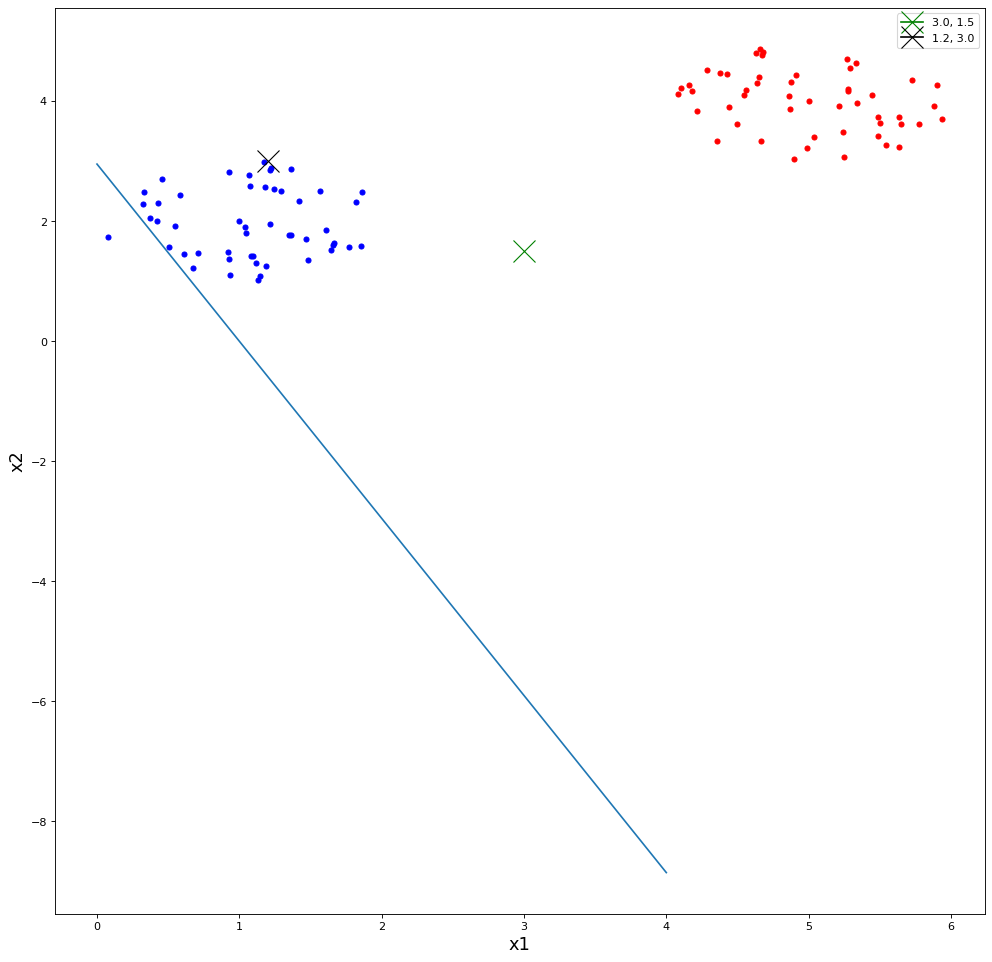

In [8]:
idx_1=np.where(y==1)

idx_2=np.where(y==-1)

plt.figure(num=None, figsize=(15,15), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X[idx_1,0], X[idx_1,1], s=20, c='b', marker="o")

plt.scatter(X[idx_2,0], X[idx_2,1], s=20, c='r', marker="o")


plt.xlabel("x1", fontsize=16)
plt.ylabel("x2", fontsize=16)

f = np.arange(0.0,5.0)
z = (-w[0]/w[1])*f + w0

plt.plot(f, z)

point1, = plt.plot([3.0], [1.5], marker='x', markersize=20, color="green", label='3.0, 1.5')
point2, = plt.plot([1.2], [3.0], marker='x', markersize=20, color="black", label='1.2, 3.0')

plt.legend(handles=[point1, point2])


plt.show()   